In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


with open('../../data/df_postcnt_per_tag_year.pkl', 'rb') as f:
    df_postcnt_per_tag_year = pickle.load(f)

with open('../../data/df_postcnt_per_tag_year_01.pkl', 'rb') as f:
    df_postcnt_per_tag_year_01 = pickle.load(f)

In [2]:
import numpy as np
pd.__version__

'2.2.0'

In [3]:
df_postcnt_per_tag_year_01

,year,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2008,2050,2724,0,4279,7460,1415,8,1,927,...,1,0,12,5874,301,683,510,152,136,841
1,2009,12844,18720,0,23871,45933,9576,521,0,6790,...,35,0,160,23020,1423,4319,3073,1223,714,3666
2,2010,26961,43456,0,54239,75244,22790,2260,2,15605,...,1029,0,523,30831,2310,9006,6005,3364,1154,6589
3,2011,41986,89567,0,98396,112191,47399,5825,14,32406,...,3789,0,1197,38642,3653,14966,9668,6466,2069,11353
4,2012,64004,135746,1,143949,137814,74605,12161,751,50834,...,7361,0,2349,36218,6723,19903,13094,10072,3851,16965
5,2013,96035,194759,50,189616,164444,112346,22160,3038,77081,...,10435,0,4394,33237,12814,26628,17984,13379,5522,21592
6,2014,115792,234094,1020,215698,161798,132472,30738,5658,89781,...,13162,18,5823,26762,16445,29077,19429,18118,7186,23734
7,2015,136736,254793,7139,214557,154204,132246,40573,8987,88332,...,16704,378,7094,23124,21573,28149,18861,20962,8742,23991
8,2016,157980,263553,20067,196216,148463,126884,44271,15239,83641,...,18313,2623,9203,21077,23280,24173,16618,22287,10471,22489
9,2017,191445,249398,34388,173865,131036,116893,50900,23167,77738,...,17005,8614,11747,18193,25973,21558,15413,23152,11560,20731


tag

In [4]:
# df_postcnt_per_tag_year

df_postcnt_per_tag_year_melt = df_postcnt_per_tag_year.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year.columns[1:])

df_postcnt_per_tag_year_01_melt = df_postcnt_per_tag_year_01.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year_01.columns[1:])

In [5]:
# df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)
df_postcnt_top10 = df_postcnt_per_tag_year_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)


df_postcnt_01_top10 = df_postcnt_per_tag_year_01_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)

In [6]:
df_postcnt_top10

,year,variable,value
15,2023,python,106558.98333333333333329434
31,2023,javascript,54035.31666666666666660556
79,2023,c#,36836.08333333333333332782
47,2023,reactjs,35920.63333333333333330727
63,2023,java,35551.83333333333333331299
...,...,...,...
240,2008,php,1834.41666666666666666632
0,2008,python,1729.58333333333333333312
608,2008,sql_server,1617.86666666666666666634
160,2008,sql,1436.83333333333333333292


In [7]:
df_postcnt_top10['variable'] = df_postcnt_top10['variable'].str.replace('cplusplus', 'c++')
df_postcnt_01_top10['variable'] = df_postcnt_01_top10['variable'].str.replace('cplusplus', 'c++')

In [8]:
df_postcnt_top10[df_postcnt_top10['variable'] =='c++']
df_postcnt_01_top10[df_postcnt_01_top10['variable'] =='c++']

,year,variable,value
223,2023,c++,20276.73333333333333333246
222,2022,c++,35094.78333333333333333161
221,2021,c++,42232.04999999999999999792
220,2020,c++,53292.56666666666666666372
219,2019,c++,45324.66666666666666666430
218,2018,c++,47448.39999999999999999741
217,2017,c++,56216.89999999999999999611
216,2016,c++,64654.16666666666666666224
215,2015,c++,71524.04999999999999999404
214,2014,c++,73309.98333333333333332670


2012
2013
2014
2015
2016


2017
2018
2019
2020
2021
2022
2023


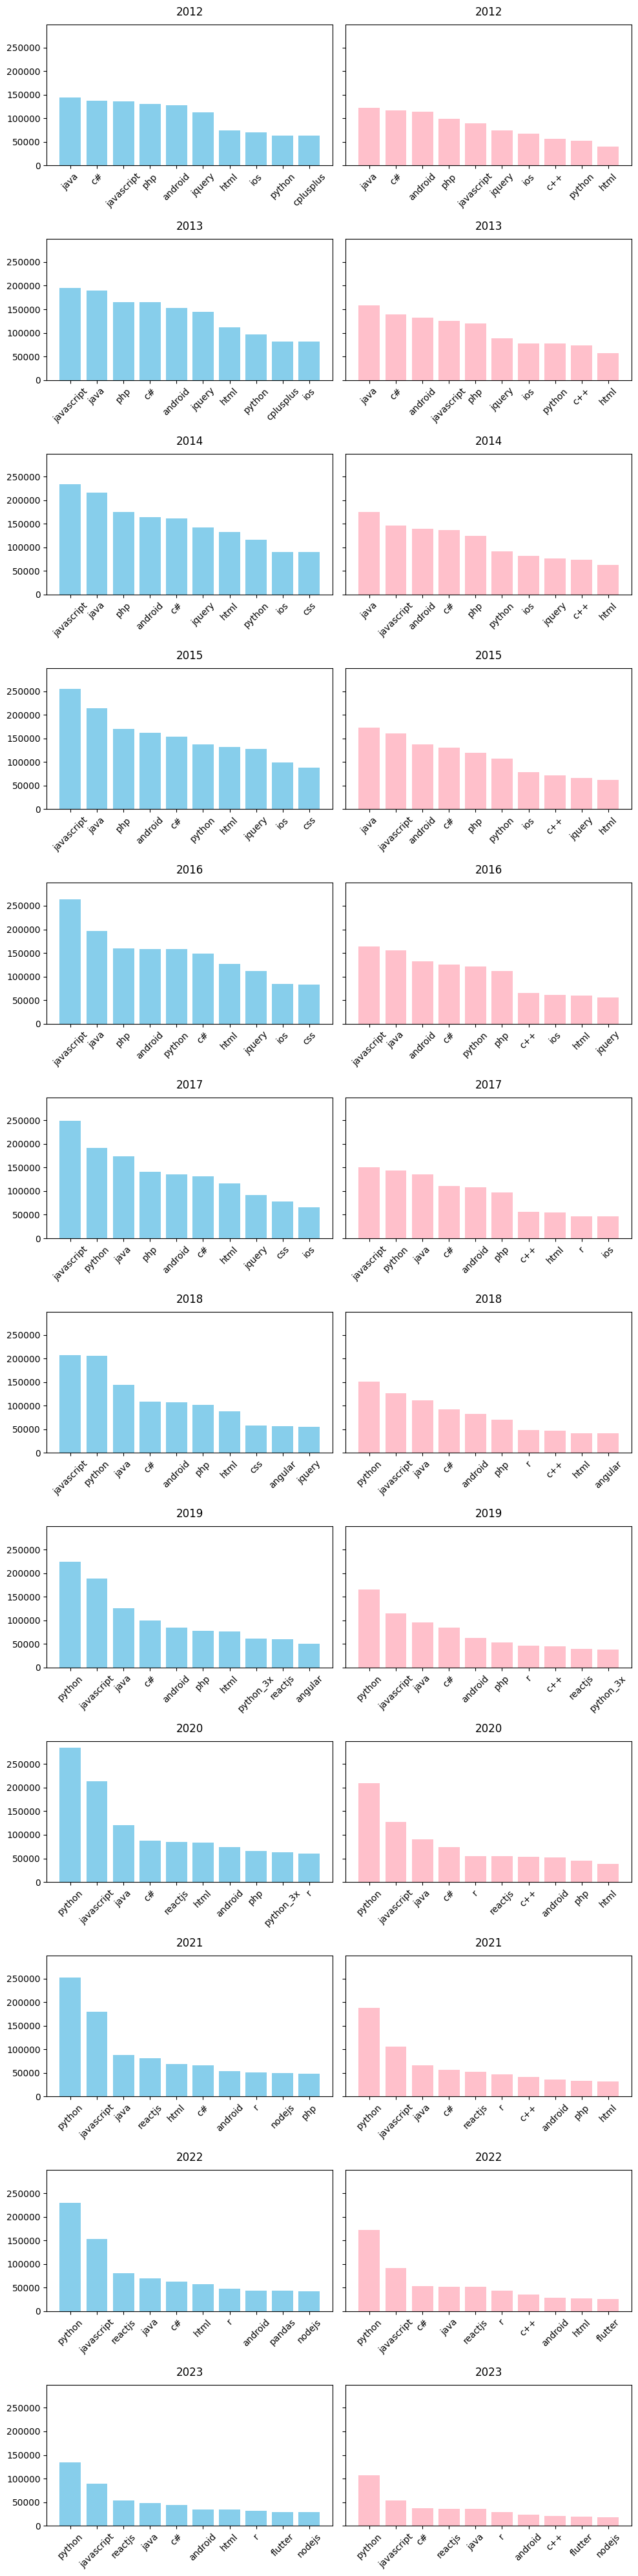

In [9]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(12, 2, figsize = (10, 40), sharey=sharey, sharex=sharex)

for x in range(0, 12):
        standard_year = 2012
        loop_year = str(standard_year + (x*1))
        print(loop_year)
    
        axs[x][0].bar(df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].variable
                        ,  df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].value
                        ,  color = 'skyblue'
                ) # hist type
        axs[x][0].set_title(str(loop_year), # add title
                pad = 10,
                loc = 'center')
        axs[x][0].tick_params(axis='x', rotation=45)

        axs[x][1].bar( df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].variable
                ,  df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].value
                ,  color = 'pink'
                ) # hist type
        axs[x][1].set_title(str(loop_year), # add title
                pad = 10,
                loc = 'center')
        axs[x][1].tick_params(axis='x', rotation=45)
 
# plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [10]:
# 왼쪽이 tag를 1로 계산한 경우, 오른쪽이 질문별로 태그의 비중을 계산하여 1/n으로 계산한 경우 시각화 

# * 왼쪽 그래프와 오른쪽 그래프 사이의 갭이 클수록 곁다리 태그이다.(하나의 질문에 여러개의 태그가 들어가서 가중치가 작아지는 경우)
#     * 프론트에서는 자바스크립트가 아직도 절대적이기 때문에, 모든 프론트앤드 관련 질문에 javascript에 껴있을 수 있음 

# * ios, android의 경우 순위가 높아진 경우인데, 오히려 범용적이지 않기 때문에 순위가 높아졌다고 해석할 수 있음
# (java는 웹 앱 다 쓰인다고 하면 안드로이드는 특정 플랫폼만을 의미하므로)
# * c++도의 경우 웹프로그래밍이 불가능한 언어로 범용성이 떨어짐(기업에서 안씀) > 특정 임베디드와같은 목적성이 있는 곳에서 쓰임 

# * 2017년 이후 r등장 (왼쪽그래프에는 없으나 오른쪽 그래프에만 존재)

# * c#은 왜 많을까?(지운님께 물어보기) pos나 의료기기에서 C#많이씀

# * 2021년 부터 등장하는 pandas의 경우 python이랑 같이 나오므로 좌측에는 있으라 우측에는 없음 

# * reactjs는 자바스크립트의 하위라이브러리로 같이 묶여서 나올 가능성이 높음




0 2012
1 2022


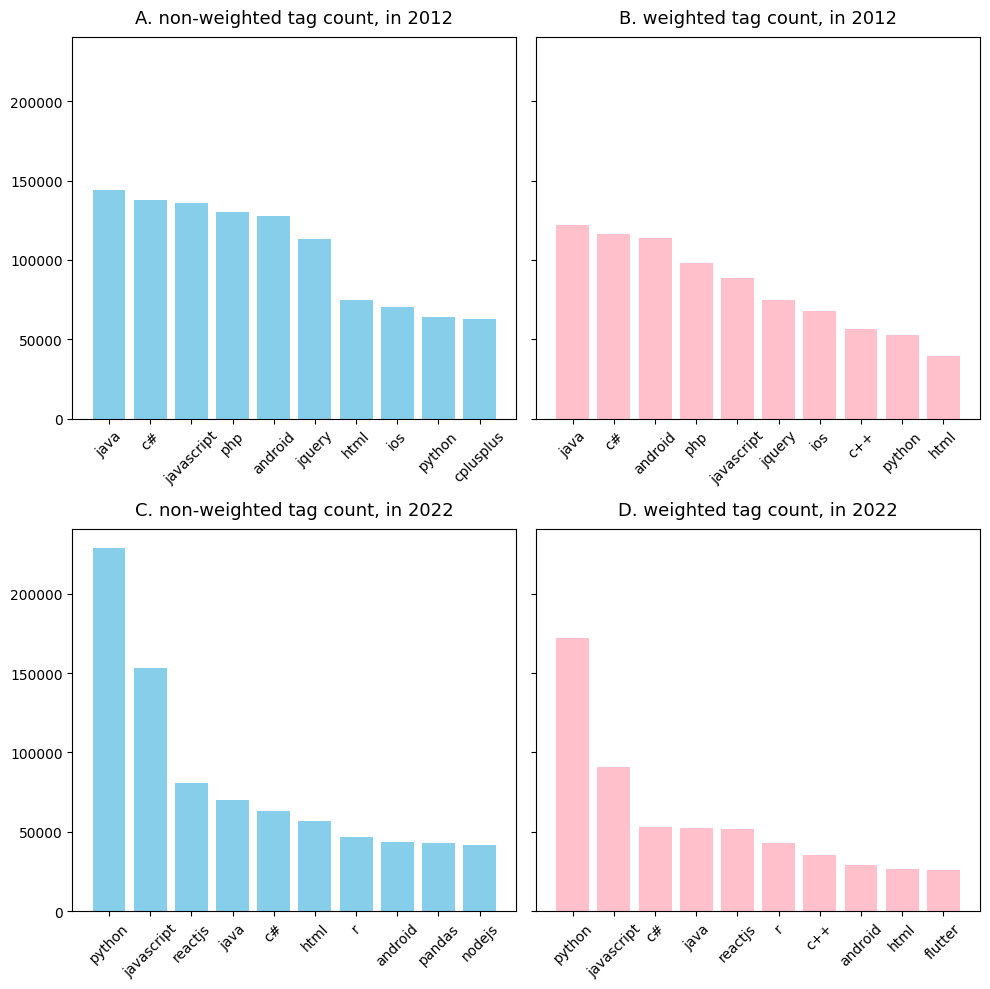

In [11]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey=sharey, sharex=sharex)

for i, year in enumerate([2012, 2022]):
        standard_year = year
        loop_year = str(standard_year)
        print(i, loop_year)
        title_0_arr = ['A. ', 'C. ']
        title_1_arr = ['B. ', 'D. ']
        axs[i][0].bar(df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].variable
                        ,  df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].value
                        ,  color = 'skyblue'
                ) # hist type
        axs[i][0].set_title(title_0_arr[i]+ 'non-weighted tag count, in '+ str(loop_year), # add title
                pad = 10,
                loc = 'center', fontsize=13)
        axs[i][0].tick_params(axis='x', rotation=45)
        

        axs[i][1].bar( df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].variable
                ,  df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].value
                ,  color = 'pink'
                ) # hist type
        axs[i][1].set_title(title_1_arr[i] + 'weighted tag count, in '+ str(loop_year), # add title
                pad = 10,
                loc = 'center', fontsize=13)
        axs[i][1].tick_params(axis='x', rotation=45)
 
# plt.suptitle("Top 10 Most Frequently Mentioned Tags", fontsize=15)    
plt.tight_layout()    
plt.show();

In [12]:
# df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)
df_postcnt_top50 = df_postcnt_per_tag_year_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(50)


df_postcnt_01_top50 = df_postcnt_per_tag_year_01_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(50)

In [17]:
weighted_value_2012 = df_postcnt_top50.loc[(df_postcnt_top50['year'] =='2012'), ['variable', 'value']]
weighted_value_2022 = df_postcnt_top50.loc[(df_postcnt_top50['year'] =='2022'), ['variable', 'value']]

In [18]:
nonweighted_value_2012 = df_postcnt_01_top50.loc[(df_postcnt_01_top50['year'] =='2012'), ['variable', 'value']]
nonweighted_value_2022 = df_postcnt_01_top50.loc[(df_postcnt_01_top50['year'] =='2022'), ['variable', 'value']]

In [21]:
weighted_value_2012 = weighted_value_2012.reset_index(drop=True).reset_index()
weighted_value_2022 = weighted_value_2022.reset_index(drop=True).reset_index()
nonweighted_value_2012 = nonweighted_value_2012.reset_index(drop=True).reset_index()
nonweighted_value_2022 = nonweighted_value_2022.reset_index(drop=True).reset_index()

In [24]:
weighted_value_2012['index'] = weighted_value_2012['index'] +1
weighted_value_2022['index'] = weighted_value_2022['index'] +1
nonweighted_value_2012['index'] = nonweighted_value_2012['index'] +1
nonweighted_value_2022['index'] = nonweighted_value_2022['index'] +1

In [25]:
calced_2012 = pd.merge(weighted_value_2012, nonweighted_value_2012, on = 'variable', suffixes=('_weighted', '_nonweighted'))
calced_2022 = pd.merge(weighted_value_2022, nonweighted_value_2022, on = 'variable', suffixes=('_weighted', '_nonweighted'))

In [32]:
calced_2012.tail(10)

,index_weighted,variable,value_weighted,index_nonweighted,value_nonweighted
40,41,firebase,52.16666666666666666666,42,63
41,42,swift,39.00000000000000000000,41,67
42,43,kotlin,10.99999999999999999997,43,18
43,44,flutter,1.50000000000000000000,44,3
44,45,spring_boot,1.00000000000000000000,45,2
45,46,reactjs,0.50000000000000000000,46,1
46,47,angular,0E-20,47,0
47,48,react_native,0E-20,48,0
48,49,docker,0E-20,49,0
49,50,vuejs,0E-20,50,0


In [35]:
import scipy.stats as stats
rho, p_val = stats.spearmanr(calced_2012['index_weighted'], calced_2012['index_nonweighted'])
print(rho,p_val)

0.9943337334933974 2.1662183987859452e-48


In [36]:
import scipy.stats as stats
rho, p_val = stats.spearmanr(calced_2022['index_weighted'], calced_2022['index_nonweighted'])
print(rho,p_val)

0.9420888355342137 2.0352840920679827e-24


In [ ]:
# 0.8,...제발 

In [31]:
calced_2012[['index_weighted', 'index_nonweighted']]

,index_weighted,index_nonweighted
0,1,1
1,2,2
2,3,5
3,4,4
4,5,3
5,6,6
6,7,8
7,8,10
8,9,9
9,10,7
